In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
import os.path
path = os.getcwd()
parent_folder, current_folder = os.path.split(path)
parent_folder

'/Users/jamoth/DSR/DataScienceJobs'

In [74]:
df = pd.read_csv(parent_folder+'/data/monster_all.csv', sep='\t', index_col=0)

In [80]:
df.education.value_counts()

Unspecified                       391
Bachelor's Degree                  81
Professional                       37
Master's Degree                    16
'A' Level/Higher or Equivalent     11
Vocational                          9
HND/HNC or equivalent               4
Secondary School or equivalent      4
Doctorate                           3
Name: education, dtype: int64

In [58]:
print(df.shape)

(1070, 15)


In [59]:
#df.salary_low = df.salary_low.str.strip()
#df.salary_low = df.salary_low.str.strip('£')
#df.salary_low = df.salary_low.str.strip('€')
#df.salary_low = df.salary_low.str.strip('$')
#df.salary_low = df.salary_low.str.replace(',','')

In [60]:
df.salary_high = df.salary_high.str.split('per', n=1, expand=True)[0]
#df.salary_high = df.salary_high.str.strip()
#df.salary_high = df.salary_high.str.strip('£')
#df.salary_high = df.salary_high.str.strip('€')
#df.salary_high = df.salary_high.str.strip('$')
#df.salary_high = df.salary_high.str.strip('/')
#df.salary_high = df.salary_high.str.replace(',','')

In [61]:
df = df.dropna(subset=['salary_low', 'salary_high'])

In [62]:
df['salary_low'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df['salary_high'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [63]:
df['salary_low'] = pd.to_numeric(df['salary_low'])
df['salary_high'] = pd.to_numeric(df['salary_high'])

In [65]:
# check for salary anomalies
df[df['salary_high']/df['salary_low']>3]

,description,salary,location,jobtype,duration,industry,education,career,ref_code,url,extraction_date,job_title,company,salary_low,salary_high
404,"Role: Senior Data EngineerSalary: £45,000 - £...","£45,000.00 - £650,000.00 per year","City of London, London","Full Time, Permanent",2 Days ago,Government and Public Sector,Unspecified,NaN,bbbh20133_1571148379,https://job-openings.monster.co.uk/senior-data...,2019-10-25,Senior Data Engineer,Talent International,4500000,65000000
569,Data Engineer Data Engineer needed for a growi...,"£35,000.00 - £600,000.00 per yearHoliday Fund...","Manchester, NW M14BT","Full Time, Permanent",Today,Computer Software,Professional,Experienced (Non-Manager),bbbh28217_1572870049,https://job-openings.monster.co.uk/data-engine...,2019-10-25,Data Engineer,Cathcart Associates,3500000,60000000
834,Data Engineer Data Engineer needed for a growi...,"£35,000.00 - £600,000.00 per yearHoliday Fund...","Manchester, NW M14BT","Full Time, Permanent",Today,Computer Software,Professional,Experienced (Non-Manager),bbbh28217_1572870049,https://job-openings.monster.co.uk/data-engine...,2019-11-05,Data Engineer,Cathcart Associates,3500000,60000000


In [66]:
#correct the mistake
df.loc[df['salary_high']==max(df['salary_high']),'salary_high']=df['salary_low']*2

In [67]:
df['salary_average'] = (df['salary_low']+df['salary_high'])/2

In [68]:
df.dtypes

description         object
salary              object
location            object
jobtype             object
duration            object
industry            object
education           object
career              object
ref_code            object
url                 object
extraction_date     object
job_title           object
company             object
salary_low           int64
salary_high          int64
salary_average     float64
dtype: object

(array([297., 274., 141.,  22.,   6.,   0.,   0.,   0.,   0.,   2.]),
 array([1.5000000e+02, 3.1751350e+06, 6.3501200e+06, 9.5251050e+06,
        1.2700090e+07, 1.5875075e+07, 1.9050060e+07, 2.2225045e+07,
        2.5400030e+07, 2.8575015e+07, 3.1750000e+07]),
 <a list of 10 Patch objects>)

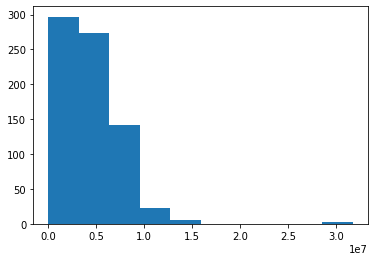

In [69]:
plt.hist(df['salary_average'])

In [70]:
df.location = df.location.str.split(',', n=1, expand=True)[0]

In [71]:
df.groupby(by='location').agg({'salary_average' : ['count','mean','median','min','max']}).head(50)

salary_average                                        \
                            count          mean      median         min   
location                                                                  
Amsterdam                       7  3.646286e+06      6000.0      6000.0   
Aurich                          1  6.750000e+04     67500.0     67500.0   
B6 7EU                          1  8.590000e+02       859.0       859.0   
B63 3BL                         3  3.000000e+06   3000000.0   3000000.0   
Banbury                         6  5.856000e+05       900.0       900.0   
Barcelona                       1  4.500000e+06   4500000.0   4500000.0   
Basingstoke                     5  3.940000e+06   4500000.0   1700000.0   
Bath                            3  4.500000e+06   4500000.0   4500000.0   
Beckington                      4  5.250000e+06   5250000.0   5250000.0   
Belfast                        12  5.250000e+06   5250000.0   5250000.0   
Berlin                          4  8.000000e+06   8000000.0   8000000.0   
Bern                            4  6.500000e+04     65000.0     65000.0   
Billingham                      1  1.850000e+06   1850000.0   1850000.0   
Birmingham                     22  3.659091e+06   2700000.0   2100000.0   
Bolton                          5  4.280000e+06   4500000.0   3400000.0   
Bristol                        16  4.772015e+06   4875000.0      1121.5   
Brockenhurst                    2  1.700000e+06   1700000.0   1700000.0   
Broughton                       4  1.900000e+06   1900000.0   1900000.0   
Cambridge                       6  5.125000e+06   5125000.0   4000000.0   
Cambridgeshire                  2  3.600000e+06   3600000.0   3600000.0   
Central London                  3  2.100000e+06   2100000.0   2100000.0   
Cheadle                         1  2.900000e+06   2900000.0   2900000.0   
Cheltenham                      4  2.307350e+06   2200000.0   2200000.0   
City of London                 21  6.190119e+06   6750000.0     42500.0   
Colchester                      2  4.750000e+06   4750000.0   4750000.0   
Coventry                        4  5.000000e+06   5000000.0   5000000.0   
Crewe                           2  8.680000e+02       868.0       868.0   
Docklands                       1  1.425000e+07  14250000.0  14250000.0   
Dusseldorf                      4  3.000000e+06   3000000.0   3000000.0   
Edinburgh                       1  5.500000e+06   5500000.0   5500000.0   
Enfield                         4  1.500000e+03      1500.0      1500.0   
England                         1  3.750000e+04     37500.0     37500.0   
Erdington                       1  8.590000e+02       859.0       859.0   
Essex                           2  3.100000e+06   3100000.0   3100000.0   
Exeter                         10  3.529500e+06   5500000.0     65000.0   
Feltham                         1  8.590000e+02       859.0       859.0   
Finchingfield                   3  3.000000e+06   3000000.0   3000000.0   
Folkestone                      1  1.950000e+06   1950000.0   1950000.0   
Franfurt                        4  9.000000e+06   9000000.0   9000000.0   
Glasgow                         4  3.205200e+06   3205200.0   3205200.0   
Hampshire                      13  3.596280e+06   4750000.0       821.0   
Handforth                       3  2.350000e+06   2350000.0   2350000.0   
Hatfield                        4  5.125000e+04     51250.0     51250.0   
Hertford                        6  2.050000e+06   2050000.0   2000000.0   
Hertfordshire                  17  4.456663e+06   5250000.0       150.0   
Hoddesdon                       1  8.920000e+02       892.0       892.0   
Keighley                        4  9.500000e+02       950.0       950.0   
Kingston Upon Hull              2  3.500000e+06   3500000.0   3500000.0   
Leeds                           7  3.006429e+06   2500000.0     45000.0   
Leyton                          4  8.710000e+02       871.0       871.0   

                                
          

In [81]:
df.shape

(1070, 15)